In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

121

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,supertech araville,sector 79,1.35,6940.0,1945.0,Carpet area: 1945 (180.7 sq.m.),3,3,3,not available,4.0,NaN,1 to 5 Year Old,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Water Purifier', '2 Fan', '1 Geyser', '3 Light', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",NaN


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
293,4.60,3771.0,Plot area 419(350.34 sq.m.)
1971,1.15,961.0,Super Built up area 1741(161.74 sq.m.)Built Up area: 1263 sq.ft. (117.34 sq.m.)Carpet area: 961 sq.ft. (89.28 sq.m.)
1563,0.26,482.0,Carpet area: 481.74 (44.76 sq.m.)
1995,0.21,484.0,Built Up area: 484 (44.97 sq.m.)
3299,1.50,1817.0,Super Built up area 1811(168.25 sq.m.)Carpet area: 1560 sq.ft. (144.93 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
196,2.45,flat,2271.0,Super Built up area 2225(206.71 sq.m.),2225.0,NaN,NaN
2856,2.95,flat,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),2003.0,1600.0,1400.0
78,1.00,house,135.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 sq.ft. (348.39 sq.m.),NaN,3750.0,NaN
3794,0.80,flat,1654.0,Super Built up area 1654(153.66 sq.m.)Built Up area: 1472 sq.ft. (136.75 sq.m.)Carpet area: 1310 sq.ft. (121.7 sq.m.),1654.0,1472.0,1310.0
973,1.65,flat,1579.0,Super Built up area 1579(146.69 sq.m.)Built Up area: 1420 sq.ft. (131.92 sq.m.)Carpet area: 1220 sq.ft. (113.34 sq.m.),1579.0,1420.0,1220.0


In [12]:
df.duplicated().sum()

121

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
19,0.5,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN
20,6.0,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
25,0.8,house,100.0,Plot area 100(9.29 sq.m.),NaN,NaN,NaN
26,6.5,house,2367.0,Plot area 263(219.9 sq.m.),NaN,NaN,NaN
30,5.5,house,2385.0,Plot area 265(221.57 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
19,0.5,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN
20,6.0,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
25,0.8,house,100.0,Plot area 100(9.29 sq.m.),NaN,NaN,NaN
26,6.5,house,2367.0,Plot area 263(219.9 sq.m.),NaN,NaN,NaN
30,5.5,house,2385.0,Plot area 265(221.57 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = all_nan_df.index
print(all_nan_index)

Index([  19,   20,   25,   26,   30,   44,   57,   67,   77,   79,
       ...
       3724, 3728, 3735, 3746, 3760, 3773, 3774, 3785, 3793, 3798],
      dtype='int64', length=546)


In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df[:5]

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
19,0.5,house,360.0,Plot area 40(33.45 sq.m.),NaN,40.0,NaN
20,6.0,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
25,0.8,house,100.0,Plot area 100(9.29 sq.m.),NaN,100.0,NaN
26,6.5,house,2367.0,Plot area 263(219.9 sq.m.),NaN,263.0,NaN
30,5.5,house,2385.0,Plot area 265(221.57 sq.m.),NaN,265.0,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
19,0.50,house,360.0,Plot area 40(33.45 sq.m.),NaN,360.00,NaN
20,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
25,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,100.00,NaN
26,6.50,house,2367.0,Plot area 263(219.9 sq.m.),NaN,2367.00,NaN
30,5.50,house,2385.0,Plot area 265(221.57 sq.m.),NaN,2385.00,NaN
44,1.40,house,1700.0,Plot area 1700(157.94 sq.m.),NaN,1700.00,NaN
57,5.51,house,3243.0,Plot area 361(301.84 sq.m.),NaN,3249.00,NaN
67,0.80,house,146.0,Plot area 146(13.56 sq.m.),NaN,146.00,NaN
77,8.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
79,11.95,house,2745.0,Plot area 305(255.02 sq.m.),NaN,2745.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,supertech araville,sector 79,1.35,6940.0,1945.0,Carpet area: 1945 (180.7 sq.m.),3,3,3,not available,4.0,NaN,1 to 5 Year Old,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Water Purifier', '2 Fan', '1 Geyser', '3 Light', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",NaN,NaN,NaN,1945.0
1,flat,indiabulls centrum park,sector 103,2.36,9182.0,2570.0,Super Built up area 2875(267.1 sq.m.)Carpet area: 2570 sq.ft. (238.76 sq.m.),4,6,3+,servant room,8.0,East,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['6 Fan', '1 Exhaust Fan', '18 Light', '6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2875.0,NaN,2570.0
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.75,9449.0,1852.0,Super Built up area 1852(172.06 sq.m.)Carpet area: 1128 sq.ft. (104.79 sq.m.),3,3,3,"pooja room,study room,servant room,others",10.0,West,1 to 5 Year Old,"['Khan Market', 'The Esplanade Mall', 'Dwarka Expressway', 'Garhi Road', 'Delhi Public School', 'SGT University', 'Aryan Hospital', 'Indira Gandhi Int. Airport', 'Basai Dhankot', 'The Executive Centre', 'Inde Hotels & Resorts', 'Appu Ghar', 'DLF Golf and Country Club']","['14 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1852.0,NaN,1128.0
3,flat,signature global city 81,sector 81,0.80,14652.0,546.0,Carpet area: 546 (50.73 sq.m.),2,2,2,study room,4.0,North,Feb 2024,"['Ambience Mall New', 'Dwarka Expressway', 'NH8', ""St. Xavier's High School"", 'Miracles Apollo Cradle', 'Hyatt Regency Gurgaon', 'Nakhrola Stadium']","['3 Fan', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,546.0
4,house,independent,sector 1,4.75,10556.0,4500.0,Built Up area: 4500 (418.06 sq.m.),6,7,0,not available,4.0,NaN,undefined,NaN,"['1 Wardrobe', '1 F

## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3133,"pooja room,study room,servant room,store room",1,1,1,1,0
556,not available,0,0,0,0,0
1910,servant room,0,1,0,0,0
2006,"pooja room,study room,servant room,store room",1,1,1,1,0
2351,not available,0,0,0,0,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,supertech araville,sector 79,1.35,6940.0,1945.0,Carpet area: 1945 (180.7 sq.m.),3,3,3,not available,4.0,NaN,1 to 5 Year Old,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Water Purifier', '2 Fan', '1 Geyser', '3 Light', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",NaN,NaN,NaN,1945.0,0,0,0,0,0
1,flat,indiabulls centrum park,sector 103,2.36,9182.0,2570.0,Super Built up area 2875(267.1 sq.m.)Carpet area: 2570 sq.ft. (238.76 sq.m.),4,6,3+,servant room,8.0,East,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['6 Fan', '1 Exhaust Fan', '18 Light', '6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2875.0,NaN,2570.0,0,1,0,0,0
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.75,9449.0,1852.0,Super Built up area 1852(172.06 sq.m.)Carpet area: 1128 sq.ft. (104.79 sq.m.),3,3,3,"pooja room,study room,servant room,others",10.0,West,1 to 5 Year Old,"['Khan Market', 'The Esplanade Mall', 'Dwarka Expressway', 'Garhi Road', 'Delhi Public School', 'SGT University', 'Aryan Hospital', 'Indira Gandhi Int. Airport', 'Basai Dhankot', 'The Executive Centre', 'Inde Hotels & Resorts', 'Appu Ghar', 'DLF Golf and Country Club']","['14 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1852.0,NaN,1128.0,1,1,0,1,1
3,flat,signature global city 81,sector 81,0.80,14652.0,546.0,Carpet area: 546 (50.73 sq.m.),2,2,2,study room,4.0,North,Feb 2024,"['Ambience Mall New', 'Dwarka Expressway', 'NH8', ""St. Xavier's High School"", 'Miracles Apollo Cradle', 'Hyatt Regency Gurgaon', 'Nakhrola Stadium']","['3 Fan', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,546.0,1,0,0,0,0
4,house,independent,sector 1,4.75,10556.0,4500.0,Buil

## 3.agePossession

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Aug 2023                 7
Dec 2025                 7
Nov 2023                 5
Jul 2024                 4
By 2025                  4
Sep 2023                 4
Aug 2024                 4
Oct 2023                 4
Nov 2024                 3
Jan 2025                 3
Feb 2024                 3
May 2024                 3
Apr 2026                 2
Jul 2027                 2
By 2027                  2
Jun 2027                 2
Oct 2025                 2
Sep 2025                 2
Aug 2025                 2
Dec 2026                 2
Jan 2026      

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,supertech araville,sector 79,1.35,6940.0,1945.0,Carpet area: 1945 (180.7 sq.m.),3,3,3,not available,4.0,NaN,Relatively New,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Water Purifier', '2 Fan', '1 Geyser', '3 Light', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",NaN,NaN,NaN,1945.0,0,0,0,0,0
1,flat,indiabulls centrum park,sector 103,2.36,9182.0,2570.0,Super Built up area 2875(267.1 sq.m.)Carpet area: 2570 sq.ft. (238.76 sq.m.),4,6,3+,servant room,8.0,East,Relatively New,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['6 Fan', '1 Exhaust Fan', '18 Light', '6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2875.0,NaN,2570.0,0,1,0,0,0
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.75,9449.0,1852.0,Super Built up area 1852(172.06 sq.m.)Carpet area: 1128 sq.ft. (104.79 sq.m.),3,3,3,"pooja room,study room,servant room,others",10.0,West,Relatively New,"['Khan Market', 'The Esplanade Mall', 'Dwarka Expressway', 'Garhi Road', 'Delhi Public School', 'SGT University', 'Aryan Hospital', 'Indira Gandhi Int. Airport', 'Basai Dhankot', 'The Executive Centre', 'Inde Hotels & Resorts', 'Appu Ghar', 'DLF Golf and Country Club']","['14 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1852.0,NaN,1128.0,1,1,0,1,1
3,flat,signature global city 81,sector 81,0.80,14652.0,546.0,Carpet area: 546 (50.73 sq.m.),2,2,2,study room,4.0,North,Under Construction,"['Ambience Mall New', 'Dwarka Expressway', 'NH8', ""St. Xavier's High School"", 'Miracles Apollo Cradle', 'Hyatt Regency Gurgaon', 'Nakhrola Stadium']","['3 Fan', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,546.0,1,0,0,0,0
4,house,independent,sector 1,4.75,10556.0,4500

## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails']]

,furnishDetails
3070,[]
653,NaN
2163,"['7 Fan', '1 Exhaust Fan', '1 Geyser', '6 Light', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']"
2445,"['3 Wardrobe', '5 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"
375,NaN


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[columns_to_include]
furnishings_df.head()

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vverm\AppData\Local\Temp\ipykernel_8584\2163581472.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


,Stove,Dining Table,Modular Kitchen,Geyser,Sofa,Water Purifier,Fan,Fridge,Wardrobe,Chimney,Exhaust Fan,Light,TV,AC,Bed,Washing Machine,Curtains,Microwave
0,0,0,0,1,0,1,2,0,0,0,0,3,0,2,0,0,0,0
1,0,0,1,0,0,0,6,0,0,0,1,18,0,6,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,14,0,0,0,0,0,0
3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0


In [39]:
furnishings_df.shape

(3803, 18)

In [40]:
furnishings_df.sample(5)

,Stove,Dining Table,Modular Kitchen,Geyser,Sofa,Water Purifier,Fan,Fridge,Wardrobe,Chimney,Exhaust Fan,Light,TV,AC,Bed,Washing Machine,Curtains,Microwave
1656,0,0,0,1,0,0,3,0,0,0,0,5,0,0,0,0,5,0
964,1,0,1,5,0,1,6,0,6,1,1,24,0,6,0,0,0,1
2810,0,0,1,2,0,0,6,0,4,1,1,20,0,0,0,0,0,0
2316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [43]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)
print(wcss_reduced)    

C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

[68454.00000000032, 51816.65653745282, 41890.20259943853, 38355.47095522621, 35161.74702970004, 33218.23940771039, 31153.861139820052, 29697.535379859426, 28295.903595910146, 27395.04061488153]


C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


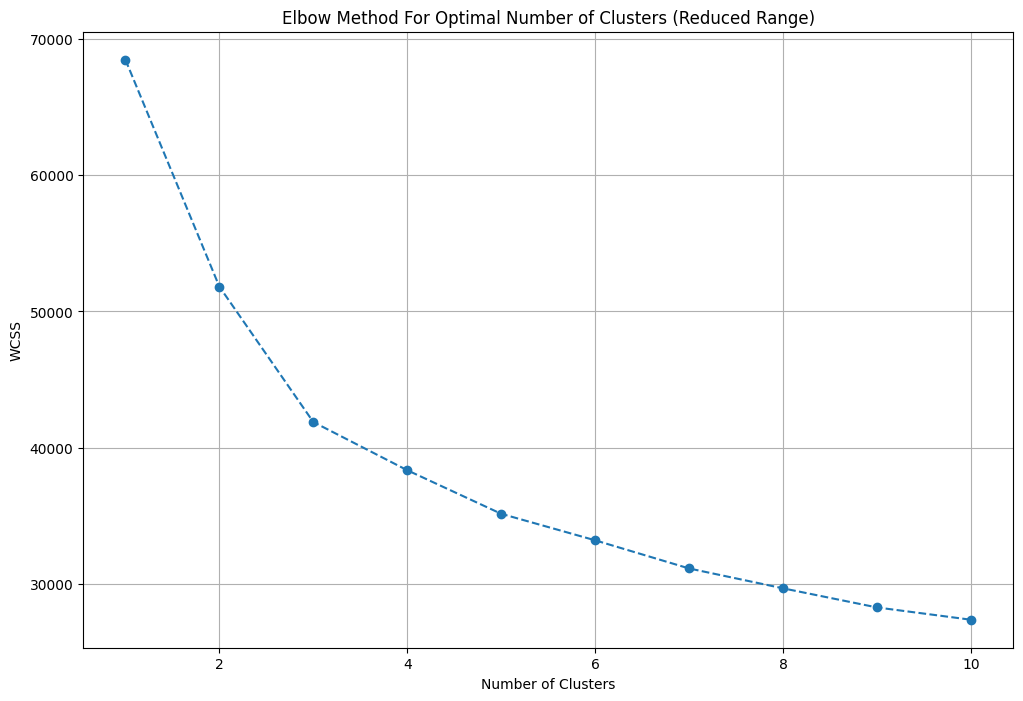

In [44]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [45]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
df = df.iloc[:,:-18]

In [47]:
df['furnishing_type'] = cluster_assignments

In [48]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2596,NaN,0
220,"['5 Fan', '1 Exhaust Fan', '3 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
556,NaN,0
3291,NaN,0
6,"['1 Fridge', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '15 Light', '1 Modular Kitchen', '5 AC', '1 Chimney', '3 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']",2


## 5.features

In [49]:
df[['society','features']].sample(5)

,society,features
3165,tata primanti,"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3216,tulip violet,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2866,independent,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM']"
1718,independent,"['Feng Shui / Vaastu Compliant', 'Water Storage', 'Visitor Parking']"
21,ats triumph,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']"


In [50]:
df['features'].isnull().sum()

635

In [51]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [52]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [53]:
temp_df = df[df['features'].isnull()]

In [54]:
temp_df.shape

(635, 26)

In [55]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']


In [56]:
df.loc[temp_df.index,'features'] = x.values

In [57]:
df['features'].isnull().sum()

481

In [58]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [59]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])
# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)
df[:10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list
0,flat,supertech araville,sector 79,1.35,6940.0,1945.0,Carpet area: 1945 (180.7 sq.m.),3,3,3,not available,4.0,NaN,Relatively New,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Water Purifier', '2 Fan', '1 Geyser', '3 Light', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",NaN,NaN,NaN,1945.0,0,0,0,0,0,0,[]
1,flat,indiabulls centrum park,sector 103,2.36,9182.0,2570.0,Super Built up area 2875(267.1 sq.m.)Carpet area: 2570 sq.ft. (238.76 sq.m.),4,6,3+,servant room,8.0,East,Relatively New,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['6 Fan', '1 Exhaust Fan', '18 Light', '6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2875.0,NaN,2570.0,0,1,0,0,0,1,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]"
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.75,9449.0,1852.0,Super Built up area 1852(172.06 sq.m.)Carpet area: 1128 sq.ft. (104.79 sq.m.),3,3,3,"pooja room,study room,servant room,others",10.0,West,Relatively New,"['Khan Market', 'The Esplanade Mall', 'Dwarka Expressway', 'Garhi Road', 'Delhi Public School', 'SGT University', 'Aryan Hospital', 'Indira Gandhi Int. Airport', 'Basai Dhankot', 'The Executive Centre', 'Inde Hotels & Resorts', 'Appu Ghar', 'DLF Golf and Country Club']","['14 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1852.0,NaN,1128.0,1,1,0,1,1,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Stor

In [60]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2676,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1224,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
features_binary_df.shape

(3803, 130)

In [62]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vverm\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

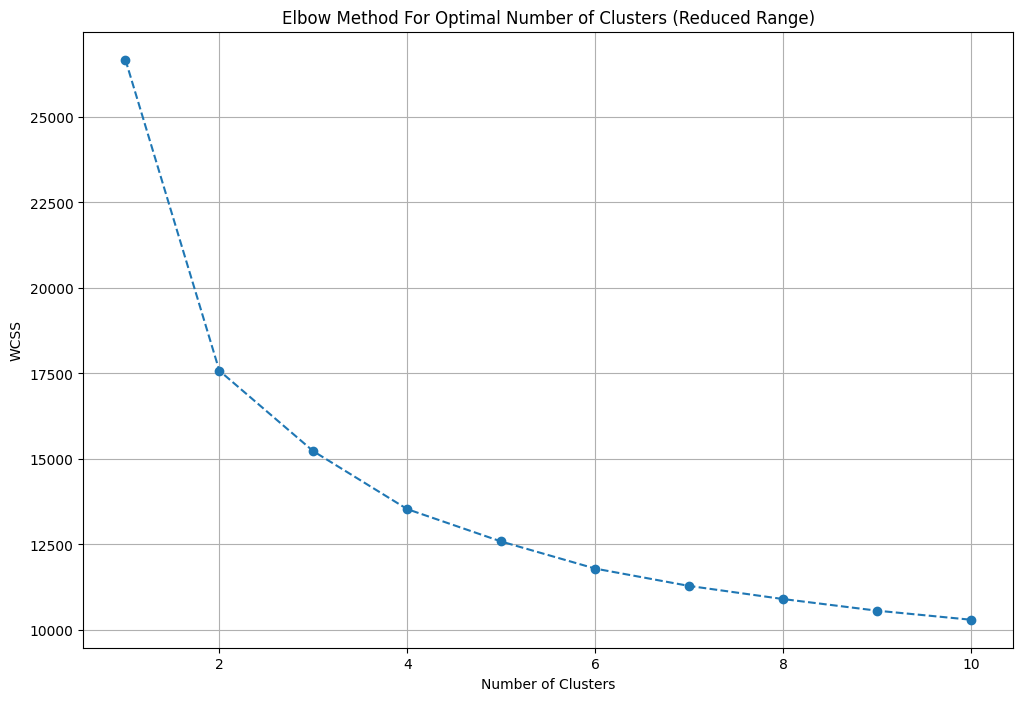

In [63]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [64]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [65]:
df['luxury_score'] = luxury_score

In [66]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,supertech araville,sector 79,1.35,6940.0,1945.0,Carpet area: 1945 (180.7 sq.m.),3,3,3,not available,4.0,NaN,Relatively New,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Water Purifier', '2 Fan', '1 Geyser', '3 Light', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",NaN,NaN,NaN,1945.0,0,0,0,0,0,0,[],0
1,flat,indiabulls centrum park,sector 103,2.36,9182.0,2570.0,Super Built up area 2875(267.1 sq.m.)Carpet area: 2570 sq.ft. (238.76 sq.m.),4,6,3+,servant room,8.0,East,Relatively New,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 14', 'Dwarka Expressway', 'Delhi Gurgaon Expressway', 'S N International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Emaar Business Park', 'Country Inn and Suites by Radisson', 'Sector 29 Gurgaon Pubs and Bars', 'HUDA Mini Golf Course', 'Infinitys Badminton Academy', 'F9 Go Karting Gurgaon']","['6 Fan', '1 Exhaust Fan', '18 Light', '6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2875.0,NaN,2570.0,0,1,0,0,0,1,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",159
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.75,9449.0,1852.0,Super Built up area 1852(172.06 sq.m.)Carpet area: 1128 sq.ft. (104.79 sq.m.),3,3,3,"pooja room,study room,servant room,others",10.0,West,Relatively New,"['Khan Market', 'The Esplanade Mall', 'Dwarka Expressway', 'Garhi Road', 'Delhi Public School', 'SGT University', 'Aryan Hospital', 'Indira Gandhi Int. Airport', 'Basai Dhankot', 'The Executive Centre', 'Inde Hotels & Resorts', 'Appu Ghar', 'DLF Golf and Country Club']","['14 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1852.0,NaN,1128.0,1,1,0,1,1,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenanc

In [67]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [68]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2080,flat,smart world gems,sector 89,0.88,7963.0,1105.0,Carpet area: 1105 (102.66 sq.m.),2,2,3,2.0,NaN,New Property,NaN,NaN,1105.0,1,0,0,0,0,0,44
2353,flat,apex our homes,sector 37c,0.35,3783.0,925.0,Super Built up area 925(85.94 sq.m.)Built Up area: 850 sq.ft. (78.97 sq.m.)Carpet area: 800 sq.ft. (74.32 sq.m.),2,2,1,7.0,East,Relatively New,925.0,850.0,800.0,0,0,0,0,0,1,158
3271,house,vipul tatvam villa,sector 48,8.50,26235.0,3240.0,Plot area 360(301.01 sq.m.),4,4,1,NaN,NaN,Relatively New,NaN,3240.0,NaN,0,0,0,0,0,0,21
945,house,independent,sector 3,3.50,9210.0,3800.0,Built Up area: 3800 (353.03 sq.m.),1,1,0,1.0,NaN,Undefined,NaN,3800.0,NaN,0,0,0,0,0,0,0
601,flat,emaar mgf emerald floors premier,sector 65,2.80,16969.0,1650.0,Super Built up area 1650(153.29 sq.m.),3,3,2,3.0,East,Relatively New,1650.0,NaN,NaN,0,1,0,0,0,0,105


In [69]:
df.shape

(3803, 23)

In [70]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)